In [1]:
import random

class SlotArm():
    def __init__(self, p):
        self.p=p
    
    def draw(self):
        if self.p > random.random():
            return 1.0
        else:
            return 0.0

In [2]:
import numpy as np
class EpsilonGreedy():

    def __init__(self, epsilon):
        self.epsilon=epsilon
    
    def initialize(self, n_arms):
        self.n=np.zeros(n_arms)
        self.v=np.zeros(n_arms)

    def select_arm(self):
        if self.epsilon > random.random():
            return np.random.randint(0, len(self.v))
        else:
            return np.argmax(self.v)
        
    def update(self, chosen_arm, reward, t):
        self.n[chosen_arm] += 1

        n = self.n[chosen_arm]
        v = self.v[chosen_arm]
        self.v[chosen_arm] = ((n-1)/float(n))*v+(1/float(n))*reward

    def label(self):
        return 'eps-greedy('+str(self.epsilon)+')'

In [3]:
import math

class UCB1():
    def initialize(self, n_arms):
        self.n=np.zeros(n_arms)
        self.w=np.zeros(n_arms)
        self.v=np.zeros(n_arms)

    def select_arm(self):
        for i in range(len(self.n)):
            if self.n[i] == 0:
                return i
        return np.argmax(self.v)
    
    def update(self, chosen_arm, reward, t):

        self.n[chosen_arm]+=1
        if reward == 1.0:
            self.w[chosen_arm]+=1

        for i in range(len(self.n)):
            if self.n[i] == 0:
                return
            
        for i in range(len(self.v)):
            self.v[i] = self.w[i] / self.n[i] + (2*math.log(t) / self.n[i]) ** 0.5

    def label(self):
        return 'ucb1'



In [4]:
def play(algo, arms, num_sims, num_time):

    times = np.zeros(num_sims * num_time)
    rewards = np.zeros(num_sims * num_time)

    for sim in range(num_sims):
        algo.initialize(len(arms))

        for time in range(num_time):

            index = sim * num_time + time
            times[index] = time+1
            chosen_arm  = algo.select_arm()
            reward = arms[chosen_arm].draw()
            rewards[index] = reward

            algo.update(chosen_arm, reward, time + 1)

    return [times, rewards]

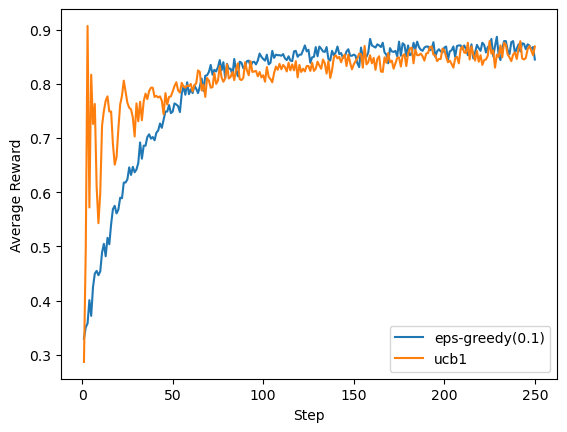

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

arms = (SlotArm(0.3), SlotArm(0.5), SlotArm(0.9))

algos = (EpsilonGreedy(0.1), UCB1())

for algo in algos:

    results = play(algo, arms, 1000, 250)

    df = pd.DataFrame({'times': results[0], 'rewards' : results[1]})
    mean = df['rewards'].groupby(df['times']).mean()
    plt.plot(mean, label=algo.label())

plt.xlabel('Step')
plt.ylabel('Average Reward')
plt.legend(loc = 'best')
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

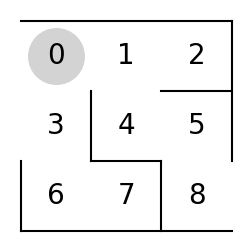

In [7]:
fig = plt.figure(figsize=(3, 3))

plt.plot([0, 3], [3, 3], color = 'k')
plt.plot([0, 3], [0, 0], color = 'k')
plt.plot([0, 0], [0, 1], color = 'k')
plt.plot([3, 3], [1, 3], color = 'k')
plt.plot([1, 1], [1, 2], color = 'k')
plt.plot([2, 3], [2, 2], color = 'k')
plt.plot([2, 1], [1, 1], color = 'k')
plt.plot([2, 2], [0, 1], color = 'k')

for i in range(3):
    for j in range(3):
        plt.text(0.5 + i, 2.5 - j, str(i + j * 3), size=20, ha='center', va='center')

circle, =plt.plot([0.5], [2.5], marker = 'o', color = '#d3d3d3', markersize=40)

plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)
plt.box(False)

In [9]:
theta = np.array([[np.nan, 1, 1, np.nan],
                 [np.nan, 1, 1, 1],
                 [np.nan, np.nan, np.nan, 1],
                 [1, np.nan, 1, np.nan],
                 [1, 1, np.nan, np.nan],
                 [np.nan, np.nan, 1, 1],
                 [1, 1, np.nan, np.nan],
                 [np.nan, np.nan, np.nan, 1]])

In [10]:
def get_pi(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    exp_theta = np.exp(theta)

    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])

    pi = np.nan_to_num(pi)
    return pi

In [11]:
pi = get_pi(theta)
print(pi)

[[0.         0.5        0.5        0.        ]
 [0.         0.33333333 0.33333333 0.33333333]
 [0.         0.         0.         1.        ]
 [0.5        0.         0.5        0.        ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.5        0.5       ]
 [0.5        0.5        0.         0.        ]
 [0.         0.         0.         1.        ]]


In [12]:
def get_a(pi, s):
    return np.random.choice([0, 1, 2, 3], p=pi[s])

In [13]:
def get_s_next(s, a):
    if a == 0:
        return s - 3
    elif a == 1:
        return s+1
    elif a == 2:
        return s+3
    elif a == 3:
        return s-1

In [14]:
def play(pi):
    s = 0
    s_a_history = [[0, np.nan]]

    while True:

        a=get_a(pi, s)

        s_next = get_s_next(s, a)

        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            break
        else:
            s = s_next

    return s_a_history

In [15]:
s_a_history = play(pi)
print(s_a_history)
print('1 에피소드의 스탭 수 :{}'.format(len(s_a_history)+1))

[[0, 1], [1, 3], [0, 2], [3, 0], [0, 1], [1, 2], [4, 0], [1, 2], [4, 0], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 2], [4, 1], [5, 3], [4, 1], [5, 2], [8, nan]]
1 에피소드의 스탭 수 :22


In [16]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    total = len(s_a_history) - 1
    s_count, a_count= theta.shape
    
    delta_theta = theta.copy()
    for i in range(0, s_count):
        for j in range(0, a_count):
            if not(np.isnan(theta[i,j])):

                sa_ij = [sa for sa in s_a_history if sa == [i,j]]
                n_ij = len(sa_ij)

                sa_i = [sa for sa in s_a_history if sa[0] == i]
                n_i = len(sa_i)

                delta_theta[i, j] = (n_ij - pi[i, j] * n_i) / total

    return theta + eta * delta_theta

In [17]:
stop_epsilon = 1e-4
theta_train = theta
pi_train = pi

for episode in range(10000):
    s_a_history = play(pi_train)

    theta_train = update_theta(theta_train, pi_train, s_a_history)

    pi_new = get_pi(theta_train)

    pi_delta = np.sum(np.abs(pi_new-pi_train))
    pi = pi_new

    print('에피소드: {}, step: {}, policy_delta: {:.4f}'.format(episode, len(s_a_history) - 1, pi_delta))

    if pi_delta < stop_epsilon:
        break

에피소드: 0, step: 20, policy_delta: 0.0172
에피소드: 1, step: 14, policy_delta: 0.0241
에피소드: 2, step: 146, policy_delta: 0.0238
에피소드: 3, step: 168, policy_delta: 0.0287
에피소드: 4, step: 60, policy_delta: 0.0236
에피소드: 5, step: 82, policy_delta: 0.0276
에피소드: 6, step: 40, policy_delta: 0.0289
에피소드: 7, step: 28, policy_delta: 0.0362
에피소드: 8, step: 22, policy_delta: 0.0368
에피소드: 9, step: 32, policy_delta: 0.0454
에피소드: 10, step: 110, policy_delta: 0.0412
에피소드: 11, step: 28, policy_delta: 0.0541
에피소드: 12, step: 164, policy_delta: 0.0523
에피소드: 13, step: 26, policy_delta: 0.0496
에피소드: 14, step: 24, policy_delta: 0.0529
에피소드: 15, step: 80, policy_delta: 0.0476
에피소드: 16, step: 86, policy_delta: 0.0464
에피소드: 17, step: 38, policy_delta: 0.0528
에피소드: 18, step: 36, policy_delta: 0.0453
에피소드: 19, step: 64, policy_delta: 0.0527
에피소드: 20, step: 34, policy_delta: 0.0575
에피소드: 21, step: 20, policy_delta: 0.0749
에피소드: 22, step: 20, policy_delta: 0.0897
에피소드: 23, step: 122, policy_delta: 0.0843
에피소드: 24, step: 56, p

In [28]:
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state%3)+0.5, 2.5 - int(state/3))
    return circle

anim = animation.FuncAnimation(fig, animate,
                               frames=len(s_a_history), interval = 200, repeat=False)
HTML(anim.to_jshtml())

/var/folders/c0/b_w45qjs1t5d43gl071wj_x00000gn/T/ipykernel_99025/380861932.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  circle.set_data((state%3)+0.5, 2.5 - int(state/3))


In [24]:
import matplotlib
print(matplotlib.get_backend())

module://matplotlib_inline.backend_inline


In [36]:
pi = get_pi(theta)
pi

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.5       , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.5       , 0.5       , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ]])

In [37]:
a, b = theta.shape
Q = np.random.rand(a, b) * theta
print(Q)

[[       nan 0.74818874 0.35468545        nan]
 [       nan 0.3126648  0.10754032 0.39770807]
 [       nan        nan        nan 0.27401951]
 [0.22197717        nan 0.57068626        nan]
 [0.42622868 0.40497172        nan        nan]
 [       nan        nan 0.11500926 0.10761383]
 [0.46877089 0.58173904        nan        nan]
 [       nan        nan        nan 0.9310418 ]]


In [38]:
def get_a(s, Q, epsilon, pi):
    if np.random.rand() < epsilon:
        return np.random.choice([0, 1, 2, 3], p=pi[s])
    else:
        return np.nanargmax(Q[s])

In [39]:
def sarsa(s, a, r, s_next, a_next, Q):
    eta = 0.1
    gamma = 0.9

    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    return Q

In [40]:
def q_learning(s, a, r, s_next, a_next, Q):
    eta = 0.1
    gamma = 0.9

    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    return Q

In [41]:
def play(Q, epsilon, pi):
    s = 0
    a = a_next = get_a(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]

    while True:
        a = a_next
        s_next = get_s_next(s, a)

        s_a_history[-1][1] = a
        s_a_history.append([s_next, np.nan])

        if s_next==8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_a(s_next, Q, epsilon, pi)

        Q = sarsa(s, a, r, s_next,  a_next, Q)

        if s_next == 8:
            break
        else:
            s = s_next

    return s_a_history, Q

In [42]:
epsilon = 0.5

for episode in range(10):
    epsilon = epsilon / 2

    s_a_history, Q = play(Q, epsilon, pi)

    print('episode: {}, step :{}'.format(episode, len(s_a_history)-1))

episode: 0, step :402
episode: 1, step :244
episode: 2, step :14
episode: 3, step :4
episode: 4, step :4
episode: 5, step :4
episode: 6, step :4
episode: 7, step :4
episode: 8, step :4
episode: 9, step :4


In [43]:
def animate(i):
    state = s_a_history[i][0]
    circle.set_data((state%3)+0.5, 2.5 - int(state/3))
    return circle

anim = animation.FuncAnimation(fig, animate,
                               frames=len(s_a_history), interval = 200, repeat=False)
HTML(anim.to_jshtml())

/var/folders/c0/b_w45qjs1t5d43gl071wj_x00000gn/T/ipykernel_99025/380861932.py:3: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  circle.set_data((state%3)+0.5, 2.5 - int(state/3))
